In this task, a decision tree classifer is used to classify the iris dataset. The packages and the dataset are imported for the analysis

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from matplotlib import pyplot as plt
import pydotplus
import pandas as pd
import numpy as np

In [ ]:
iris = pd.read_csv('Iris.csv')
feature_cols = iris.columns[1:5]
X = iris.iloc[:,1:5]
Y = iris.iloc[:,5]

**Exploratory data analysis**

The missing values will be checked and the distribution of data will also be checked

In [ ]:
X.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

No missing values are present. Let us check the distribution of data.

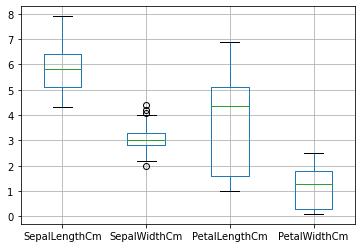

In [ ]:
X.boxplot()
plt.show()

We can see that the dataset is negatively skewed and sepal width has some outliers. As there exists a group within the outliers, these outliers are not removed. They are kept for further analysis.

**Model fitting**

The dataset is splitted into training and test set. Following this, the data is fitted into the model. The fitted model is then visualized.

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
y = pd.get_dummies(Y) ## one hot encoding

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
tree.fit(X_train, y_train) ## model fitting

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

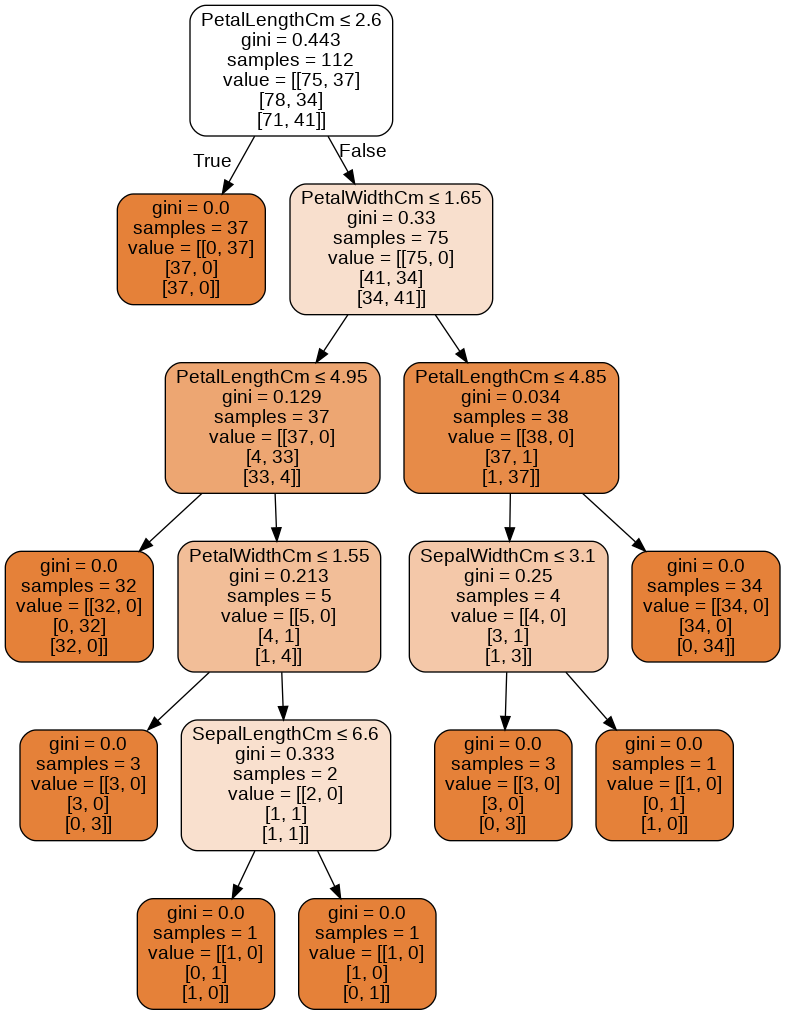

In [ ]:
## visualizing the fitted tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Model Testing**

We use the test set to find the performance of the fitted model. 

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
result = confusion_matrix(species, predictions) 

In [ ]:
result

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
sum(np.diagonal(result))/np.sum(result) * 100

97.36842105263158

The accuracy of the model on the test set is found to be 97.36%. The fitted model has classified well.